In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy as sp
import sympy
import time
import random
from jax import grad
import jax.numpy as jnp

## 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Let A and B be two matrices of order (n, k) and (k, m), respectively. The elements of the product matrix: $AB = C$ are given by, $$C_{ij} = \Sigma_{l=1}^k \; A_{il}\;B_{lj} \tag{1}$$

There will be $n \times m$ elements in $C$ and for each element, we need to perform $k$ multiplications and $k-1$ additions.

Therefore, total multiplications = $n \times m \times k$

and total additions = $n \times m \times (k-1)$

## 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Let matrices A and B be two matrices of order (3, 3) and (3, 2) respectively, $$ A =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$$

$$
B = 
\begin{bmatrix}
1 & 2 \\
4 & 5 \\
7 & 8
\end{bmatrix}
$$

Their product C is given by,
$$ C =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
\begin{bmatrix}
1 & 2 \\
4 & 5 \\
7 & 8
\end{bmatrix}
$$

In [2]:
# Using list of lists.
A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

B = [[1, 2],
     [4, 5],
     [7, 8]]

start_time = time.time()
C = [[0] * len(B[0]) for _ in range(len(A))]

for i in range(len(A)):
    for j in range(len(B[0])):
        C[i][j] = sum(A[i][r] * B[r][j] for r in range(len(A[0])))
        
end_time = time.time()

# Time taken by the list of lists method
time_list = end_time - start_time
print('C as obtained using list of lists:')
for row in C:
    print(row)
print(f'Time taken using list of lists: {time_list:.6f} seconds\n')

## Using numpy.
A_numpy = np.array(A)
B_numpy = np.array(B)

start_time_numpy = time.time()
C_numpy = np.matmul(A_numpy, B_numpy)
end_time_numpy = time.time()

# Time taken using numpy arrays.
time_numpy = end_time_numpy - start_time_numpy

print('C as obtained using numpy:')
print(C_numpy)
print(f'Time taken using numpy arrays: {time_numpy:.6f} seconds')


C as obtained using list of lists:
[30, 36]
[66, 81]
[102, 126]
Time taken using list of lists: 0.000117 seconds

C as obtained using numpy:
[[ 30  36]
 [ 66  81]
 [102 126]]
Time taken using numpy arrays: 0.000085 seconds


### Numpy gives solutions faster due to the following reasons:
- NumPy uses highly optimized C and Fortran libraries, which are much faster than using for loops.
- NumPy operations are vectorized.
- NumPy arrays are more memory-efficient than Python lists.

## 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Finding the highest element in a list of length $n$ requires $n$ comparisons (one pass), therefore, time complexity is $\mathcal{O}(n)$. Similarly, finding second highest element requires another pass, therefore, time complexity is $\mathcal{O}(2n)$. To find the median, $\frac{n}{2}$ passes will be required, therefore, time complexity is: $\mathcal{O}(\frac{n^2}{2})$.

A more efficient method is the Quickselect algorithm, which has time complexity of $\mathcal{O}(n)$. Quickselect is a selection algorithm to find the k-th smallest element in an unordered list.

In [3]:
# Method 1: Repeated Passes (Inefficient Method)
def find_median_repeated_passes(arr):
    n = len(arr)
    for i in range((n + 1) // 2):
        max_element = max(arr)
        arr.remove(max_element)
    if n % 2 == 1:
        return max(arr)
    else:
        second_max_element = max(arr)
        return (max_element + second_max_element) / 2

# Method 2: Quickselect (Efficient Method)
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quickselect(arr, low, high, k):
    if low == high:
        return arr[low]
    pivot_index = partition(arr, low, high)
    if k == pivot_index:
        return arr[k]
    elif k < pivot_index:
        return quickselect(arr, low, pivot_index - 1, k)
    else:
        return quickselect(arr, pivot_index + 1, high, k)

def find_median_quickselect(arr):
    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr, 0, n - 1, n // 2)
    else:
        left = quickselect(arr, 0, n - 1, n // 2 - 1)
        right = quickselect(arr, 0, n - 1, n // 2)
        return (left + right) / 2

# Test and compare the performance
arr = [random.randint(1, 10000) for _ in range(1000)]

# Repeated Passes Method
arr_copy = arr.copy()
start_time = time.time()
median_repeated_passes = find_median_repeated_passes(arr_copy)
end_time = time.time()
time_repeated_passes = end_time - start_time
print(f'Median (Repeated Passes): {median_repeated_passes}, Time taken: {time_repeated_passes:.6f} seconds')

# Quickselect Method
arr_copy = arr.copy()
start_time = time.time()
median_quickselect = find_median_quickselect(arr_copy)
end_time = time.time()
time_quickselect = end_time - start_time
print(f'Median (Quickselect): {median_quickselect}, Time taken: {time_quickselect:.6f} seconds')

# Using numpy.medium
arr_copy = arr.copy()
start_time = time.time()
median_numpy = np.median(arr_copy)
end_time = time.time()
time_numpy = end_time - start_time
print(f'Median (NumPy): {median_numpy}, Time taken: {time_numpy:.6f} seconds')


Median (Repeated Passes): 5041.5, Time taken: 0.010169 seconds
Median (Quickselect): 5041.5, Time taken: 0.004419 seconds
Median (NumPy): 5041.5, Time taken: 0.000881 seconds


## 4.What is the gradient of the following function with respect to x and y? $$f(x, y) = x^2y + y^3 \sin(x)$$

Gradient with respect to x: $\frac{\partial f}{\partial x} = 2xy + y^3\cos(x)$.

Gradient with respect to y: $\frac{\partial f}{\partial y} = x^2 + 3y^2\sin(x)$.

We can use finite difference method to calculate the gradient.

In [4]:
# Define the function f(x, y)
def f(x, y):
    return x**2*y + y**3*np.sin(x)

def finite_difference_gradient(f, x, y, h):
    """
    Calculate the gradient of function f at the point (x, y)
    using the finite difference method.
    
    Parameters:
    - f: The function f(x, y) whose gradient is to be calculated.
    - x: The x-coordinate.
    - y: The y-coordinate.
    - h: A small step size for the finite difference approximation.
    
    Returns:
    - grad_x: The partial derivative of f with respect to x.
    - grad_y: The partial derivative of f with respect to y.
    """
    # Partial derivative with respect to x
    grad_x = (f(x + h, y) - f(x, y)) / h
    
    # Partial derivative with respect to y
    grad_y = (f(x, y + h) - f(x, y)) / h
    
    return grad_x, grad_y

## random points in (x, y) coordinates to calculate gradient.
np.random.seed(10)
points_xy = 10*np.random.rand(5, 2)

## Array to store the gradient values.
grad_fd = np.zeros(points_xy.shape)

for idx, point in enumerate(points_xy):
    grad_fd[idx] = finite_difference_gradient(f, point[0], point[1], h=1e-10)
    
count = 0
while count < len(points_xy):
    print(f'Gradient of f wrt x and y using finite difference method at {points_xy[count]} = {grad_fd[count][0]}, {grad_fd[count][1]}, respectively.')
    count += 1

Gradient of f wrt x and y using finite difference method at [7.71320643 0.20751949] = 3.2025049279127416, 59.62146332194607, respectively.
Gradient of f wrt x and y using finite difference method at [6.33648235 7.48803883] = 514.159523845592, 49.11214546154952, respectively.
Gradient of f wrt x and y using finite difference method at [4.98507012 2.24796646] = 25.47189126289595, 10.251000048810965, respectively.
Gradient of f wrt x and y using finite difference method at [1.98062865 7.60530712] = -145.1525122320163, 163.07524219882907, respectively.
Gradient of f wrt x and y using finite difference method at [1.69110837 0.88339814] = 2.9050983840761546, 5.1840975956451985, respectively.


## 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [5]:
# Define the function f(x, y)
def f(x, y):
    return x**2*y + y**3*jnp.sin(x)

# Gradient with respect to x
grad_f_x = grad(f, argnums=0)

# Gradient with respect to y
grad_f_y = grad(f, argnums=1)

# Evaluate the gradients
grad_f_x_val = np.zeros(len(points_xy))
grad_f_y_val = np.zeros(len(points_xy))

for idx, point in enumerate(points_xy):
    grad_f_x_val[idx] = grad_f_x(point[0], point[1])
    grad_f_y_val[idx] = grad_f_y(point[0], point[1])

count = 0
while count < len(points_xy):
    print(f'Gradient of f wrt x and y using JAX at {points_xy[count]} = {grad_f_x_val[count]}, {grad_f_y_val[count]}, respectively.')
    count += 1

Gradient of f wrt x and y using JAX at [7.71320643 0.20751949] = 3.2025351524353027, 59.62146759033203, respectively.
Gradient of f wrt x and y using JAX at [6.33648235 7.48803883] = 514.1592407226562, 49.11200714111328, respectively.
Gradient of f wrt x and y using JAX at [4.98507012 2.24796646] = 25.471893310546875, 10.250993728637695, respectively.
Gradient of f wrt x and y using JAX at [1.98062865 7.60530712] = -145.1525115966797, 163.07521057128906, respectively.
Gradient of f wrt x and y using JAX at [1.69110837 0.88339814] = 2.9051010608673096, 5.184100151062012, respectively.


## 6. Use sympy to confirm that you obtain the same gradient analytically.

In [6]:
x, y = sympy.symbols('x y')

f = x**2*y + y**3*sympy.sin(x)

grad_f_x_sympy = sympy.diff(f, x)
grad_f_y_sympy = sympy.diff(f, y)

print(f'Gradient of f wrt x: {grad_f_x_sympy}')
print(f'Gradient of f wrt y: {grad_f_y_sympy}')

Gradient of f wrt x: 2*x*y + y**3*cos(x)
Gradient of f wrt y: x**2 + 3*y**2*sin(x)


In [7]:
# Gradients obtained using sympy.
def grad_f_wrt_x(x, y):
    return 2*x*y + y**3*np.cos(x)

def grad_f_wrt_y(x, y):
    return x**2 + 3*y**2*np.sin(x)

# Evaluate the gradients at points in `points_xy`.
grad_f_x_val_sympy = np.zeros(len(points_xy))
grad_f_y_val_sympy = np.zeros(len(points_xy))

for idx, point in enumerate(points_xy):
    grad_f_x_val_sympy[idx] = grad_f_wrt_x(point[0], point[1])
    grad_f_y_val_sympy[idx] = grad_f_wrt_y(point[0], point[1])

count = 0
while count < len(points_xy):
    print(f'Gradient of f wrt x and y using sympy at {points_xy[count]} = {grad_f_x_val_sympy[count]}, {grad_f_y_val_sympy[count]}, respectively.')
    count += 1

Gradient of f wrt x and y using sympy at [7.71320643 0.20751949] = 3.202535298931603, 59.62146845484006, respectively.
Gradient of f wrt x and y using sympy at [6.33648235 7.48803883] = 514.159240462964, 49.111976215082855, respectively.
Gradient of f wrt x and y using sympy at [4.98507012 2.24796646] = 25.471890983779957, 10.250994090884868, respectively.
Gradient of f wrt x and y using sympy at [1.98062865 7.60530712] = -145.15252380191743, 163.075206835692, respectively.
Gradient of f wrt x and y using sympy at [1.69110837 0.88339814] = 2.9051011607014603, 5.184100512175995, respectively.


## 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [8]:
student_data = {
    '2022': {
        'Branch' : {
            '1' : {
                'Roll Number' : 223101, 'Name' : 'A', 'Marks' : {
                    'Maths' : 100, 'English' : 70, 'Science' : 80
                }
            },
            
            '2' : {
                'Roll Number' : 223102, 'Name' : 'B', 'Marks' : {
                    'Maths' : 80, 'English' : 70, 'Science' : 100
                }
            }
        }
    },
    
    '2023': {
        'Branch' : {
            '1' : {
                'Roll Number' : 233101, 'Name' : 'C', 'Marks' : {
                    'Maths' : 100, 'English' : 80, 'Science' : 70
                }
            },
            
            '2' : {
                'Roll Number' : 233102, 'Name' : 'D', 'Marks' : {
                    'Maths' : 80, 'English' : 100, 'Science' : 70
                }
            }
        }
    },
    
    '2024': {
        'Branch' : {
            '1' : {
                'Roll Number' : 243101, 'Name' : 'E', 'Marks' : {
                    'Maths' : 100, 'English' : 70, 'Science' : 80
                }
            },
            
            '2' : {
                'Roll Number' : 243102, 'Name' : 'F', 'Marks' : {
                    'Maths' : 80, 'English' : 100, 'Science' : 70
                }
            }
        }
    },
    
    '2025': {
        'Branch' : {
            '1' : {
                'Roll Number' : 253101, 'Name' : 'G', 'Marks' : {
                    'Maths' : 100, 'English' : 70, 'Science' : 80
                }
            },
            
            '2' : {
                'Roll Number' : 253102, 'Name' : 'H', 'Marks' : {
                    'Maths' : 80, 'English' : 70, 'Science' : 100
                }
            }
        }
    }
}

student_data

{'2022': {'Branch': {'1': {'Roll Number': 223101,
    'Name': 'A',
    'Marks': {'Maths': 100, 'English': 70, 'Science': 80}},
   '2': {'Roll Number': 223102,
    'Name': 'B',
    'Marks': {'Maths': 80, 'English': 70, 'Science': 100}}}},
 '2023': {'Branch': {'1': {'Roll Number': 233101,
    'Name': 'C',
    'Marks': {'Maths': 100, 'English': 80, 'Science': 70}},
   '2': {'Roll Number': 233102,
    'Name': 'D',
    'Marks': {'Maths': 80, 'English': 100, 'Science': 70}}}},
 '2024': {'Branch': {'1': {'Roll Number': 243101,
    'Name': 'E',
    'Marks': {'Maths': 100, 'English': 70, 'Science': 80}},
   '2': {'Roll Number': 243102,
    'Name': 'F',
    'Marks': {'Maths': 80, 'English': 100, 'Science': 70}}}},
 '2025': {'Branch': {'1': {'Roll Number': 253101,
    'Name': 'G',
    'Marks': {'Maths': 100, 'English': 70, 'Science': 80}},
   '2': {'Roll Number': 253102,
    'Name': 'H',
    'Marks': {'Maths': 80, 'English': 70, 'Science': 100}}}}}

## 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [9]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks  # marks is a dictionary with subject names as keys and marks as values

    def __repr__(self):
        return f'Student(name={self.name}, roll_number={self.roll_number}, marks={self.marks})'


class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students  # students is a list of Student objects

    def __repr__(self):
        return f'Branch(name={self.name}, students={self.students})'


class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches  # branches is a list of Branch objects

    def __repr__(self):
        return f'Year(year={self.year}, branches={self.branches})'

# Store data...
# Create students
students_2022_branch1 = [
    Student(name='A', roll_number=223101, marks={'Maths': 100, 'English' : 70, 'Science': 80}),
]

students_2022_branch2 = [
    Student(name='B', roll_number=223102, marks={'Maths': 80, 'English' : 70, 'Science': 100}),
]

students_2023_branch1 = [
    Student(name='C', roll_number=233101, marks={'Maths': 100, 'English' : 80, 'Science': 70}),
]

students_2023_branch2 = [
    Student(name='D', roll_number=233102, marks={'Maths': 80, 'English' : 100, 'Science': 70}),
]

students_2024_branch1 = [
    Student(name='E', roll_number=243101, marks={'Maths': 100, 'English' : 70, 'Science': 80}),
]

students_2024_branch2 = [
    Student(name='F', roll_number=243102, marks={'Maths': 80, 'English' : 100, 'Science': 70}),
]

students_2025_branch1 = [
    Student(name='G', roll_number=243101, marks={'Maths': 100, 'English' : 70, 'Science': 80}),
]

students_2025_branch2 = [
    Student(name='H', roll_number=243102, marks={'Maths': 80, 'English' : 70, 'Science': 100}),
]

# Create branches
branch_2022_1 = Branch(name="Branch 1", students=students_2022_branch1)
branch_2022_2 = Branch(name="Branch 2", students=students_2022_branch2)

branch_2023_1 = Branch(name="Branch 1", students=students_2023_branch1)
branch_2023_2 = Branch(name="Branch 2", students=students_2023_branch2)

branch_2024_1 = Branch(name="Branch 1", students=students_2024_branch1)
branch_2024_2 = Branch(name="Branch 2", students=students_2024_branch2)

branch_2025_1 = Branch(name="Branch 1", students=students_2025_branch1)
branch_2025_2 = Branch(name="Branch 2", students=students_2025_branch2)

# Create years
year_2022 = Year(year=2022, branches=[branch_2022_1, branch_2022_2])
year_2023 = Year(year=2023, branches=[branch_2023_1, branch_2023_2])
year_2024 = Year(year=2024, branches=[branch_2024_1, branch_2024_2])
year_2025 = Year(year=2025, branches=[branch_2025_1, branch_2025_2])

# Database of years
database = [year_2022, year_2023, year_2024, year_2025]

# Display the data.
for year in database:
    print(year)
    for branch in year.branches:
        print(f'  {branch}')
        for student in branch.students:
            print(f'    {student}')

Year(year=2022, branches=[Branch(name=Branch 1, students=[Student(name=A, roll_number=223101, marks={'Maths': 100, 'English': 70, 'Science': 80})]), Branch(name=Branch 2, students=[Student(name=B, roll_number=223102, marks={'Maths': 80, 'English': 70, 'Science': 100})])])
  Branch(name=Branch 1, students=[Student(name=A, roll_number=223101, marks={'Maths': 100, 'English': 70, 'Science': 80})])
    Student(name=A, roll_number=223101, marks={'Maths': 100, 'English': 70, 'Science': 80})
  Branch(name=Branch 2, students=[Student(name=B, roll_number=223102, marks={'Maths': 80, 'English': 70, 'Science': 100})])
    Student(name=B, roll_number=223102, marks={'Maths': 80, 'English': 70, 'Science': 100})
Year(year=2023, branches=[Branch(name=Branch 1, students=[Student(name=C, roll_number=233101, marks={'Maths': 100, 'English': 80, 'Science': 70})]), Branch(name=Branch 2, students=[Student(name=D, roll_number=233102, marks={'Maths': 80, 'English': 100, 'Science': 70})])])
  Branch(name=Branch 1

## 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

In [10]:
def f2(x):
    return x**2

def f3(x):
    return x**3/100

def f4(x):
    return np.sin(x)

def f5(x):
    return np.sin(x)/x

def f6(x):
    return np.log(x)

def f7(x):
    return np.exp(x)

# input-domain
x = np.arange(0.5, 100, 0.5)

# Evaluate functions.
y1 = x
y2 = f2(x)
y3 = f3(x)
y4 = f4(x)
y5 = f5(x)
y6 = f6(x)
y7 = f7(x)


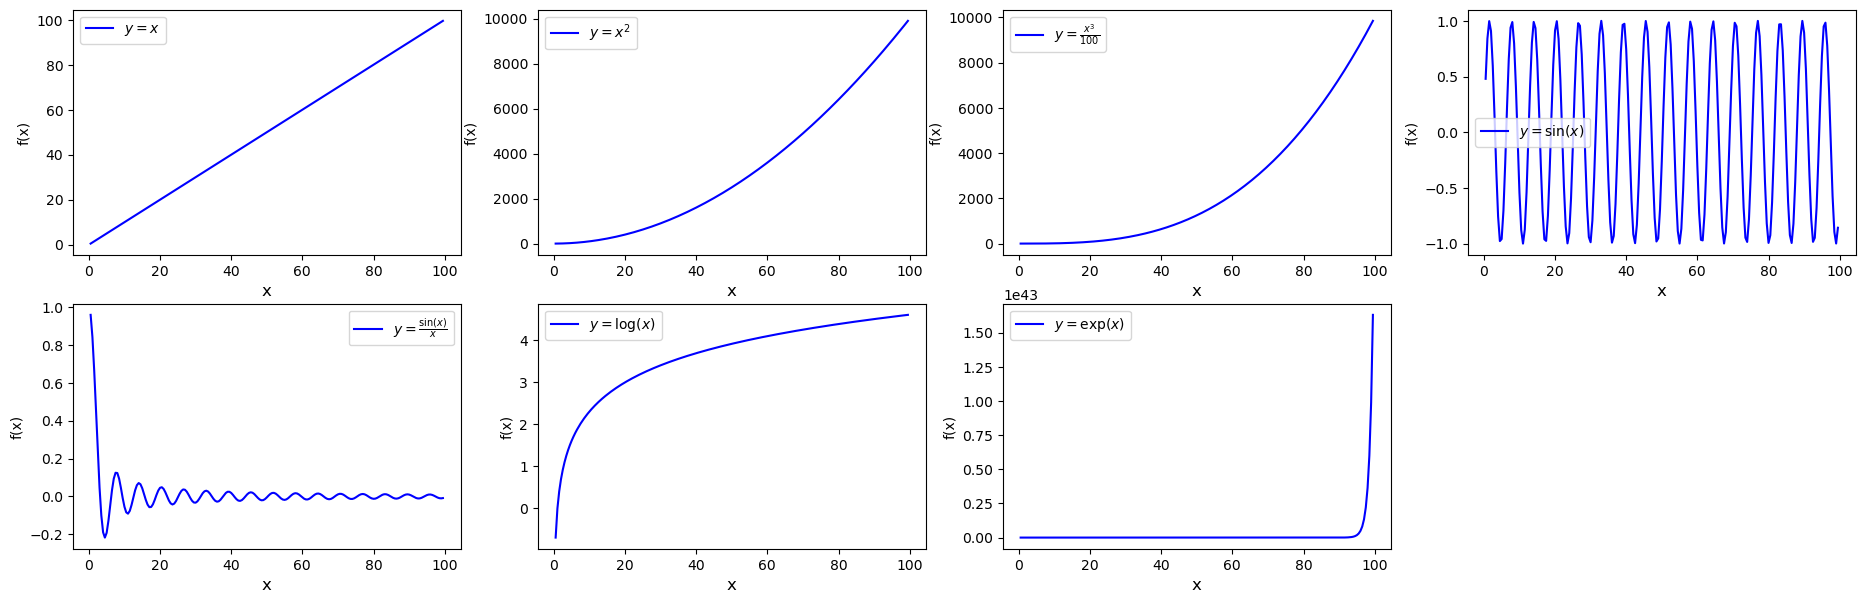

In [11]:
fig, axes = plt.subplots(2, 4, figsize = (23, 7))
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[0, 2], axes[0, 3]
ax5, ax6, ax7, ax8 = axes[1, 0], axes[1, 1], axes[1, 2], axes[1, 3]
fig.delaxes(axes[1, 3])

ax1.plot(x, y1, c = 'b', label = r'$y = x$')
ax1.set_xlabel('x', fontsize = 12)
ax1.set_ylabel('f(x)')
ax1.legend()

ax2.plot(x, y2, c = 'b', label = r'$y = x^2$')
ax2.set_xlabel('x', fontsize = 12)
ax2.set_ylabel('f(x)')
ax2.legend()

ax3.plot(x, y3, c = 'b', label = r'$y = \frac{x^3}{100}$')
ax3.set_xlabel('x', fontsize = 12)
ax3.set_ylabel('f(x)')
ax3.legend()

ax4.plot(x, y4, c = 'b', label = r'$y = \sin(x)$')
ax4.set_xlabel('x', fontsize = 12)
ax4.set_ylabel('f(x)')
ax4.legend()

ax5.plot(x, y5, c = 'b', label = r'$y = \frac{\sin(x)}{x}$')
ax5.set_xlabel('x', fontsize = 12)
ax5.set_ylabel('f(x)')
ax5.legend()

ax6.plot(x, y6, c = 'b', label = r'$y = \log(x)$')
ax6.set_xlabel('x', fontsize = 12)
ax6.set_ylabel('f(x)')
ax6.legend()

ax7.plot(x, y7, c = 'b', label = r'$y = \exp(x)$')
ax7.set_xlabel('x', fontsize = 12)
ax7.set_ylabel('f(x)')
ax7.legend()

plt.show()